# Dived and Conquer Algorithm
: 주어진 문제를 부분 문제들로 분할하고 각 부분 문제에 대한 부분 해를 찾은 후, 부분 해들을 통합하여 원래 문제의 해결책을 찾는 전략
1. Divide : 주어진 문제를 동일한 부분 문제들로 재귀적으로 분할 ( 입력 사이즈 줄어듦 )
2. Conquer : 부분 문제들의 부분 해를 찾음
3. Combine : 필요하다면 부분 해들을 통합하는 top down 문제 해결 전략 

<br>

## 👉 Merge Sort 
: 문제가 각 재귀마다 두 개의 부분 문제의 크기가 1/2로 감소하는 알고리즘
- 입력에 민감하지 않음 : 모든 경우의 분석 가능 o(nlogn)
- 정렬 시 추가 메모리 공간 필요
- 분할 과정보다 통합 과정이 중요함

<br>

**✔️ 합병 정렬 수행 시간 분석**

    입력 사이즈를 n = 2^k라고 가정
    합병 정렬의 분할은 리스트의 중간 index 계산과 2번의 재귀 호출이므로 o(c) 소요
    단위 연산은 통합(합병)에서의 비교 연산으로 각 통합 단계마다 n-1번 비교하며, logn 단계가 존재하므로 o(nlogn) 소요

In [3]:
def merge(items, temp, low, mid, high):
    i = low
    j = mid+1
    for k in range(low, high+1):
        if i > mid:
            temp[k] = items[j]
            j +=1
        elif j > high:
            temp[k] = items[i]
            i +=1
        elif items[j] < items[i]:
            temp[k] = items[j]
            j +=1
        else :
            temp[k] = items[i]
            i +=1
    for k in range(low, high+1):
        items[k] = temp[k]

def merge_sort(items, temp, low, high):
    if high <= low:
        return None
    mid = low + (high-low)//2
    merge_sort(items, temp, low, mid)
    merge_sort(items, temp, mid+1, high)
    merge(items, temp, low, mid, high)

items = [40,10,20,50,70,30,90]
temp =[None]*len(items)
print("합병 정렬 전 : ", items)
merge_sort(items, temp, 0, len(items)-1)
print("합병 정렬 후 : ", items)

합병 정렬 전 :  [40, 10, 20, 50, 70, 30, 90]
합병 정렬 후 :  [10, 20, 30, 40, 50, 70, 90]


## 👉 Closest Pair Problem 
: 문제가 각 재귀마다 두 개의 부분 문제의 크기가 1/2로 감소하는 알고리즘

#### d차원상에 존재하는 n개의 점들의 집합이 주어졌을 때, 두 점 사이의 거리가 가장 가까운 한 쌍을 찾는 문제 

1. Divide : n개의 점들을 x좌표에 따라 오름차순으로 정렬하고, n개의 점들의 집합이 두개의 같은 크기의 서브 집합으로 나눌 수 있도록 y축과 평행한 직선을 이용해 공간을 분할
  - 종료조건 : 집합 사이즈가 n <= 3이면 brute-force 사용
2. Conquer : 각 서브 집합에서 재귀적으로 두 점 사이의 거리가 가장 가까운 한쌍 검색
3. Combine : 각각 다른 서브 집합에 속하는 쌍들 중 거리가 최소가 되는 쌍 검색 후, closest_pair_l, closest_pair_r, closest_pair_m 중 가장 가까운 쌍 선택

<br>

###✔️ distance_m 계산 방법

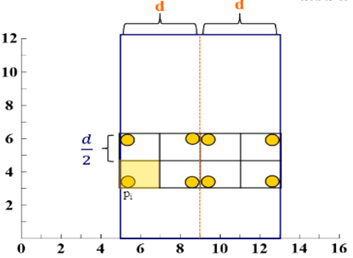



- Strip 내부에 속하는 점들의 집합 S = {p1, p2, ..., pn}
- S에 속한 점들 중 왼쪽 서브 집합에 속한 임의의 점 pi=(xi, yi)와 오른쪽 서브 집합에 속한 임의의 점 pj=(xj, yj)가 존재하고 distance(pi, pj) <= d 라고 가정
- pi의 y좌표 값이 가장 작다고 가정

<br>

**pi와 pj 사이에는 최대 6개의 점이 존재함**

🧐❔ 위의 그림과 같이 8개의 정사각형에는 최대 한 개의 점만이 포함될 수 있음

🧐❔ 정사각형 내에 두 개의 점이 포함된다면 두 개의 점 사이의 거리가 d보다 짧아지므로 

**따라서**, pi와 쌍을 이루어 그 거리가 d보다 가까운 점을 찾기 위해서는 최대 7번의 거리 계산만 하면 됨 o(c)
- 이때, pi와 다른 띠 내부의 점들의 y좌표 간 거리가 d보다 가까운 점들만 고려한다면, 7번 이내 거리 계산 가능

<br>

**✔️ 최근접쌍 알고리즘 수행 시간 분석**

    입력 사이즈를 n = 2^k라고 가정했을 때, 전처리 과정으로서 점을 x좌표로 정렬 o(nlogn)
    최근접쌍의 분할은 합병정렬과 마찬가지로 상수 시간 소요 o(1)
    단위 연산은 통합(합병)에서의 거리 계산으로 각 통합 단계마다 y좌표를 정렬하고, n-2번 거리 계산을 하므로 o(nlogn + n) = o(nlogn)
    logn -1 개의 통합 단계가 존재하므로 o(nlog^2n)
- 이때, 전처리 과정에서 점들을 y좌표로 정렬한 추가 리스트를 사용하면 o(nlogn)

In [14]:
import math
import copy

def distance(p1, p2) :
  return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def compute_closest_pair(P, n) : 
  P.sort(key = lambda x: x[0])
  Q = copy.deepcopy(P)
  Q.sort(key = lambda x : x[1])
  return closest_pair(P, Q, n)

def closest_pair(P, Q, n) :
  if n <= 3:
    return brute_force(P, n)

  d = float('inf')
  cp = ()
  mid = n//2
  midpoint = P[mid]
  distance_l, closest_pair_l = closest_pair(P[:mid], Q, mid)
  distance_r, closest_pair_r = closest_pair(P[mid:], Q, n - mid)

  if distance_l <= distance_r :
    d = distance_l
    cp = closest_pair_l
  else :
    d = distance_r
    cp = closest_pair_r

  strip = []
  for i in range(n) : 
    if midpoint[0] - d <= Q[i][0] <= midpoint[0] + d : 
      strip.append(Q[i])
  distance_m, closest_pair_m = strip_closest_pair(strip, len(strip), d, cp) 

  if d < distance_m :
    return d, cp
  else :
    return distance_m, closest_pair_m

def brute_force(P, n) :
  min_val = float('inf')
  cp = ()
  for i in range(n) :
    for j in range(i+1, n):
      if distance(P[i], P[j]) < min_val :
        min_val = distance(P[i], P[j])
        cp = (P[i], P[j])
  return min_val, cp

def strip_closest_pair(strip, size, d, cp):
  distance_m = d
  closest_pair_m = cp
  for i in range(size):
    j = i+1
    while j < size and ( strip[j][1] - strip[i][1] ) < distance_m :
      if distance(strip[i], strip[j]) < distance_m :
        distance_m = distance(strip[i], strip[j])
        closest_pair_m = (strip[i], strip[j])
      j += 1
  return distance_m, closest_pair_m

P = [(1, 1), (2, 2), (1, 3), (3, 6), (9, 15), (8, 12), (4, 7), (9, 7), (4, 4), (5, 4), (3, 3), (6, 7), (8, 9), (9, 2)]
n = len(P)
result = compute_closest_pair(P, n)
print("The smallest distance and closest pair :", result)

P = [(1, 11), (3, 7), (5, 3), (7, 7), (9, 6), (13, 7), (15, 11), (16, 4)]
n = len(P)
result = compute_closest_pair(P, n)
print("The smallest distance and closest pair :", result)

The smallest distance and closest pair : (1.0, ((4, 4), (5, 4)))
The smallest distance and closest pair : (2.23606797749979, ((9, 6), (7, 7)))


## 👉 Quick Sort 
: 문제가 각 재귀마다 두 개의 부분 문제의 크기가 일정하지 않은 크기로 감소하는 알고리즘

- 평균 시간 복잡도가 o(nlogn)인 다른 정렬 알고리즘보다 빠름 
  - 상수적으로 빠르다는 뜻
- 합병 정렬과 다르게 추가 메모리 공간이 필요하지 않음
- 통합 과정이 필요하지 않음

<br>

**✔️ 퀵 정렬 수행 시간 분석**

    입력 사이즈를 n = 2^k라고 가정
    1. 최선/평균의 경우 o(nlogn) : logn 만큼 분할하며 분할마다 n-1번 비교하므로 o(nlogn) 소요 
    2. 최악의 경우 o(n^2) : 입력이 이미 정렬되어 있거나 역순으로 정렬되어 있다면, n번 분할하고 각 분할 단계마다 n-1, n-2, ..., 1번의 원소를 비교하므로 o(n(n-1)/2) 소요


In [4]:
def partition(items, pivot, high):
    i = pivot +1
    j = high
    while True:
        while i < high and items[i] < items[pivot]:
            i += 1
        while j > pivot and items[j] > items[pivot]:
            j -= 1
        if j <= i:
            break
        items[i], items[j] = items[j], items[i]
        i += 1
        j -= 1
    items[pivot], items[j] = items[j], items[pivot]
    return j

def quick_sort(items, low, high):
    if low<high:
        pivot = partition(items, low, high)
        quick_sort(items, low, pivot-1)
        quick_sort(items, pivot+1, high)

items = [40,10,20,50,70,30,90]
print("퀵 정렬 전 : ", items)
quick_sort(items, 0, len(items)-1)
print("퀵 정렬 후 : ", items)

퀵 정렬 전 :  [40, 10, 20, 50, 70, 30, 90]
퀵 정렬 후 :  [10, 20, 30, 40, 50, 70, 90]


In [7]:
def partition(items, low, high):
    pivot = items[high]
    i = low 
    for j in range(low, high):
      if items[j] <= pivot :
        items[i], items[j] = items[j], items[i]
        i += 1 # i는 items의 원소 중 pivot 값보다 작은 원소의 개수만큼 증가함
    items[i], items[high] = items[high],items[i]
    return i

def quick_sort(items, low, high):
    if low<high:
        pivot = partition(items, low, high)
        quick_sort(items, low, pivot-1)
        quick_sort(items, pivot+1, high)

items = [40,10,20,50,70,30,90]
print("퀵 정렬 전 : ", items)
quick_sort(items, 0, len(items)-1)
print("퀵 정렬 후 : ", items)

퀵 정렬 전 :  [40, 10, 20, 50, 70, 30, 90]
퀵 정렬 후 :  [10, 20, 30, 40, 50, 70, 90]


## 👉 Binary Search Algorithm
: 문제가 각 재귀마다 두 개의 부분 문제 중 하나는 고려할 필요가 없으며 부분 문제의 크기가 1/2로 감소하는 알고리즘



In [ ]:
def binary_search(dataset, left, right, target):
    if left > right :
        return "Not found"
    else :
        mid = (left+right)//2
        if dataset[mid] == target :
            return mid
        elif dataset[mid] > target :
            binary_search(dataset, left, mid-1, target)
        else:
            binary_search(dataset, mid+1, right, target)

## 👉 Selection Problem 
: 문제가 각 재귀마다 두 개의 부분 문제 중 하나는 고려할 필요가 없으며 부분 문제의 크기가 일정하지 않은 크기로 감소하는 알고리즘

#### 사이즈가 n인 정수 리스트의 원소 중 k번째로 작은 원소를 찾는 문제 
1. Divide : parition 함수를 이용하여 리스트 내 n개의 원소 정렬 시 pivot을 기준으로 서브 리스트 생성
2. Conquer 
- k번째로 작은 원소의 값이 pivot 값보다 작으면 왼쪽 서브리스틑 대상으로 quick selection 실행, 
- 크면 오른쪽 서브리스트를 대상으로 quick selection 실행, 
- pivot 값과 같다면 pivot값을 결과로 반환
3. Combine : 필요없음

**✔️ Quick Selection 수행 시간 분석**
    
    입력 사이즈는 n = 2^k라고 가정
    1. 최선의 경우 o(n) : quick sort와 마찬가지로 k번 균등 분할하는 경우, 이진검색과 같이 검색 공간이 1/2로 감소하므로 n + n/2 + n/4 + ... = 2n
    2. 평균의 경우 o(n) : 예를 들어, pivot이 매 분할마다 1:3 비율로 왼/오른쪽 서브리스트를 분할하고 k가 분할 시 항상 오른쪽 서브리스트에 존재한다면 n + 3/4 n + 9/16 n +... = 4n
    3. 최악의 경우 o(n^2) : 매 분할마다 가장 큰/작은 원소를 pivot으로 선택하는 경우 n + (n-1) + ... + 1 

In [9]:
def partition(items, low, high):
    pivot = items[high]
    i = low 
    for j in range(low, high):
      if items[j] <= pivot :
        items[i], items[j] = items[j], items[i]
        i += 1 # i는 items의 원소 중 pivot 값보다 작은 원소의 개수만큼 증가함
    items[i], items[high] = items[high],items[i]
    return i

def quick_selection(items, low, high, k):
  pivot = partition(items, low, high)
  if pivot == k-1 :
    return items[pivot]
  elif pivot < k-1 :
    return quick_selection(items, pivot+1, high, k)
  else :
    return quick_selection(items, low, pivot-1, k)

items = [4, 8, 12, 16, 20, 24, 26, 22, 18, 14, 10, 6, 2]
print(quick_selection(items, 0, len(items)-1, 3))

6
